In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent.agent import Agent
from collections import deque
from dqn import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### Create agents

In [2]:
vanilla_agent = Agent(state_size, action_size)
double_agent = Agent(state_size, action_size, doubleQN=True)
PerDouble_agent = Agent(state_size, action_size, doubleQN=True, PER=True)
dueling_agent = Agent(state_size, action_size, doubleQN=True, PER=True, dueling_network=True)

### Train agents

In [3]:
vanilla_dqn = train(vanilla_agent)
double_dqn = train(double_agent)
PerDouble_dqn = train(PerDouble_agent)
dueling_dqn = train(dueling_agent)

Episode 100	Average Score: 4.74	 Epsilon: 0.01
Episode 200	Average Score: 9.55	 Epsilon: 0.01
Episode 300	Average Score: 12.64	 Epsilon: 0.01
Episode 400	Average Score: 14.11	 Epsilon: 0.01
Episode 500	Average Score: 15.91	 Epsilon: 0.01
Episode 600	Average Score: 15.64	 Epsilon: 0.01
Episode 700	Average Score: 15.31	 Epsilon: 0.01
Episode 100	Average Score: 2.21	 Epsilon: 0.01
Episode 200	Average Score: 6.90	 Epsilon: 0.01
Episode 300	Average Score: 8.64	 Epsilon: 0.01
Episode 400	Average Score: 11.64	 Epsilon: 0.01
Episode 500	Average Score: 14.88	 Epsilon: 0.01
Episode 600	Average Score: 15.28	 Epsilon: 0.01
Episode 700	Average Score: 15.50	 Epsilon: 0.01
Episode 100	Average Score: 1.78	 Epsilon: 0.01
Episode 200	Average Score: 5.72	 Epsilon: 0.01
Episode 300	Average Score: 7.00	 Epsilon: 0.01
Episode 400	Average Score: 11.52	 Epsilon: 0.01
Episode 500	Average Score: 14.00	 Epsilon: 0.01
Episode 600	Average Score: 15.77	 Epsilon: 0.01
Episode 700	Average Score: 15.23	 Epsilon: 0.01


### Plot training

In [4]:
training_data = pd.DataFrame([vanilla_dqn, double_dqn, PerDouble_dqn, dueling_dqn], ['DQN','DDQN', 'PER', 'Dueling DQN']).T
training_ma = training_data.rolling(window=100).mean()
training_std = training_data.rolling(window=100).std()

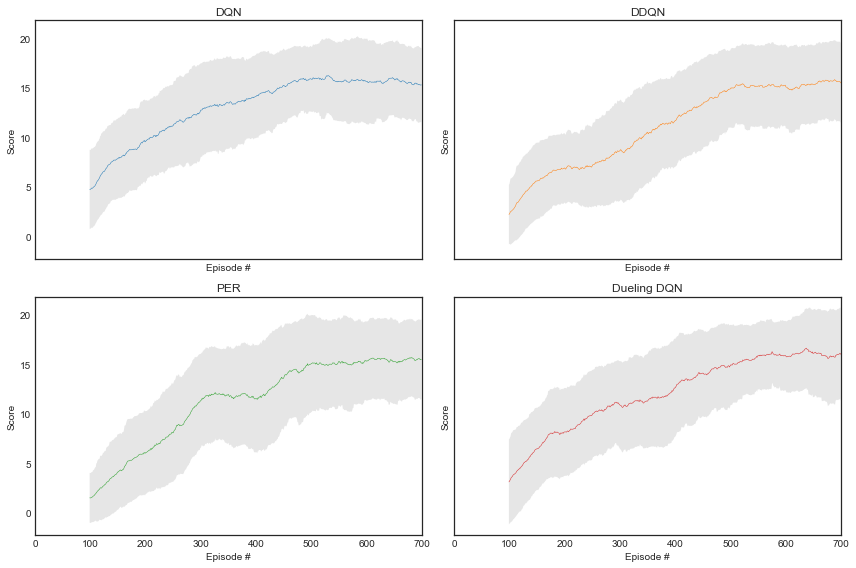

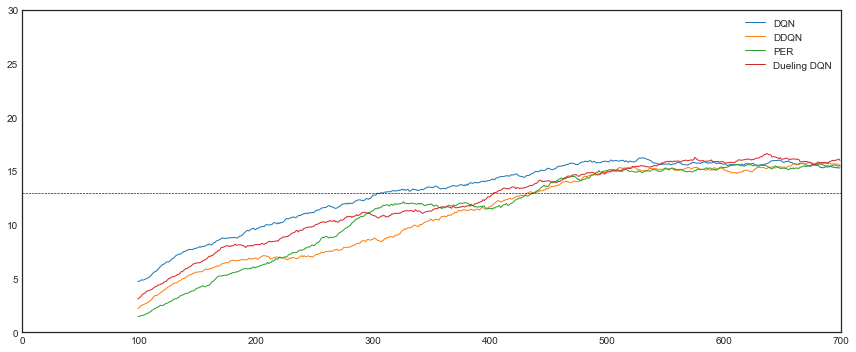

In [60]:
color_map = cm.get_cmap('tab10')
colors = [color_map(i) for i in range(4)]
plt.style.use('seaborn-white')

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

for i, ax in enumerate((ax1, ax2, ax3, ax4)):
    c=training_ma.columns[i]
    ma = training_ma[c].values
    std = training_std[c].values
    x = training_ma.index
    ax.plot(x, ma, linewidth=0.5, color=colors[i])
    ax.fill_between(x, ma+std, ma-std, facecolor=(0.9,0.9,0.9,1))
    ax.set_xlim(0, 700)
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')
    ax.set_title(training_ma.columns[i])

f.tight_layout()
f.savefig('img/training_values.eps', format='eps')

f, ax = plt.subplots(figsize=(12, 5))
training_ma.plot(ax=ax, linewidth=1, color=colors)
ax.plot([0,2000],[13,13], color='k', linestyle='--', linewidth=0.6)
ax.set_xlim(0, 700)
ax.set_ylim(0, 30)
f.tight_layout()
f.savefig('img/comparison.eps')